Question 1a.

When $p = 1$, on average 10% of observations will be used to make the prediction.

Question 1b.

When $p = 2$, on average 1% of observations will be used to make the prediction.

Question 1c.

When $p = 100$, on average 1e-100% of observations will be used to make the prediction.

Question 1d.

A drawback of KNN when p is large (e.g. $p = 100$) is that there are very few training observations “near” any given test observation. The $k$ observations that are nearest to the test observation $x_0$ may be very far away from $x_0$ in the p-dimensional space when $p$ is large. This decrease in performance as the dimension increases results from the fact that in higher dimensions, there is a reduction in sample size (there is a smaller number of observations per predictor when $p = 100$). Therefore, as dimensions increase (from $p = 1$ to $p = 100$), it can result in a given observation that has no nearby neighbors.

Question 2.

Leave one out cross-validation (LOOCV) estimates error one observation at a time. Basically, if there is a dataset with $n$ observations, LOOCV runs $n$ separate experiments where the $Y=f(X)$ relationship is learned on all $n-1$ observations (Training set) and evaluated on predicting a single observation (Test set).

On the other hand, in k-fold cross-validation, instead of taking out one observation ($n-1$), you randomly divide the full sample into $k$ groups (k-folds) of approximately equal size ($n-k$) and evaluate the test error on each fold independently. With this, similar to LOOCV, you calculate the MSE.

The benefit with k-fold cross validation is that when n is very large you don't have to run all n-experiments, like you do with LOOCV. Additionally, it does not give you a negative bias like LOOCV does (LOOCV has lowest bias, but highest variance because it trains n-models with the same data, so when it is exposed to new data, the model is not flesible enough). Therefore, k-fold cross validation provdies much better estimates of the true test error than LOOCV due to the variance-bias tradeoff.

Question 3.

Permutation tests are ways of using resampling procedures to directly estimate what chance would look like use the data set that you have. Thus it is a nonparametric class of statistics. You can use permutation tests to generate a null distribution for hypothesis testing for any form of $Y=f(X)$. This is resampling without replacement, because on each iteration you are randomly sampling from the data to build a new data set but only selecting each observation once. Permutation tests allow you to simulate your actual null hypothesis by resampling your data with replacement.

Bootstrapping, on the other hand, is a resampling with replacement from the data set that you have, in order to simulate repeated experiments from the data.  The main difference is that while bootstrap analyses usually try to
quantify the sampling distribution of some statistic computed from the data (e.g. estimate the confidence of a test-statistic), permutation analyses usually try to quantify the null distribution (generate null distribution).



In [2]:
#Question 4a.
library(ISLR)
library(class)
library(boot)
d <- read.csv(file = "unrestricted_trimmed_1_7_2020_10_50_44.csv")
library(tidyverse)
d1 <- select(d, Gender, Flanker_Unadj) %>% na.omit()
print(d1)
attach(d1)

     Gender Flanker_Unadj
1         M        121.97
2         M        130.42
3         F        112.56
4         M        121.18
5         M        126.53
6         F        101.85
7         M        107.04
8         F         94.96
9         M        113.67
10        M        108.46
11        F        115.22
12        F         98.94
13        M        115.50
14        M        110.38
15        F        111.75
16        M         86.31
17        M        124.64
18        M        104.59
19        F         96.95
20        M         85.74
21        M        103.86
22        M         95.94
23        F        102.76
24        F        106.97
25        F        101.75
26        F        100.62
27        M        119.39
28        F        115.12
29        F        108.94
30        F         97.68
31        M        106.14
32        M        137.11
33        F        115.04
34        F        112.70
35        F        113.61
36        M         98.59
37        M        113.89
38        F 

The following objects are masked from d1 (pos = 3):

    Flanker_Unadj, Gender




In [3]:
test.X <- Flanker_Unadj[1:200]
train.X <- Flanker_Unadj[201:1206]
test.Y <- Gender[1:200]
train.Y <- Gender[201:1206]

In [4]:
set.seed(1)
knn.predict.1 = knn(data.frame(train.X), data.frame(test.X), train.Y, k = 5)
table(knn.predict.1, test.Y)
sum(diag(table(knn.predict.1, test.Y)))/nrow(data.frame(test.X))

             test.Y
knn.predict.1  F  M
            F 78 48
            M 34 40

[1] 0.59

The mean classification accuracy is around 59%. 

In [5]:
#Question 4b.

set.seed(1)
knn.predict.2 = knn(data.frame(train.X), data.frame(test.X), train.Y, k = 1)
table(knn.predict.2, test.Y)
sum(diag(table(knn.predict.2, test.Y)))/nrow(data.frame(test.X))

             test.Y
knn.predict.2  F  M
            F 69 47
            M 43 41

[1] 0.55

In [6]:
set.seed(1)
knn.predict.3 = knn(data.frame(train.X), data.frame(test.X), train.Y, k = 20)
table(knn.predict.3, test.Y)
sum(diag(table(knn.predict.3, test.Y)))/nrow(data.frame(test.X))

             test.Y
knn.predict.3  F  M
            F 67 56
            M 45 32

[1] 0.495

In [23]:
set.seed(1)
knn.predict.4 = knn(data.frame(train.X), data.frame(test.X), train.Y, k = 50)
table(knn.predict.4, test.Y)
sum(diag(table(knn.predict.4, test.Y)))/nrow(data.frame(test.X))

             test.Y
knn.predict.4  F  M
            F 83 61
            M 29 27

[1] 0.55

In [30]:
set.seed(1)
knn.predict.5 = knn(data.frame(train.X), data.frame(test.X), train.Y, k = 100)
table(knn.predict.5, test.Y)
sum(diag(table(knn.predict.5, test.Y)))/nrow(data.frame(test.X))

             test.Y
knn.predict.5  F  M
            F 84 58
            M 28 30

[1] 0.57

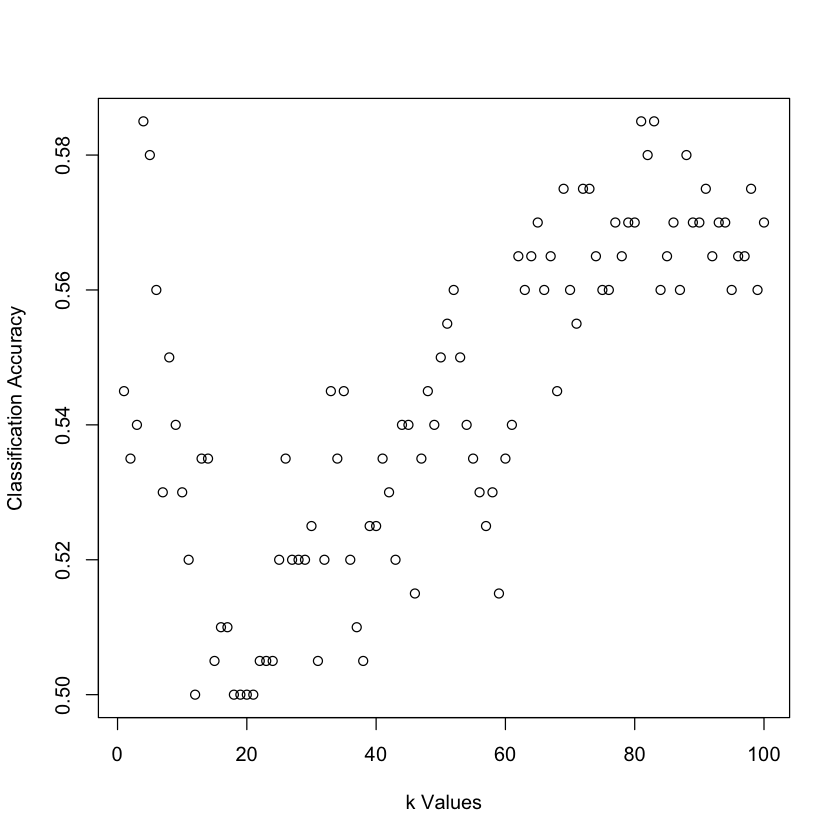

In [31]:
accuracy = numeric(length = 100)

for (k_value in 1:100) {knn.predict.all = knn(data.frame(train.X), data.frame(test.X), train.Y, k = k_value)
accuracy[k_value] = sum(diag(table(knn.predict.all, test.Y)))/nrow(data.frame(test.X))}

plot(1:100, accuracy, xlab = "k Values", ylab = "Classification Accuracy")

Looking at the outputs for different values of k, as well as at the plot, it seems that the mean classification accuracy is highest for low values of k (around k = 5), then it decreases, and then increases again at higher values of k (around k = 80). But, it seems that k = 5 gives the highest accuracy, of around 59%.

In [32]:
# Question 6
d <- read.csv(file = "unrestricted_trimmed_1_7_2020_10_50_44.csv")
library(tidyverse)
d2 <- select(d, Gender, Flanker_Unadj) %>% na.omit() %>% mutate_if(is.factor, as.numeric)
print(d2)
boot.fn <- function(data, index){return(coef(lm(Gender ~ Flanker_Unadj, data = data, subset = index)))}

     Gender Flanker_Unadj
1         2        121.97
2         2        130.42
3         1        112.56
4         2        121.18
5         2        126.53
6         1        101.85
7         2        107.04
8         1         94.96
9         2        113.67
10        2        108.46
11        1        115.22
12        1         98.94
13        2        115.50
14        2        110.38
15        1        111.75
16        2         86.31
17        2        124.64
18        2        104.59
19        1         96.95
20        2         85.74
21        2        103.86
22        2         95.94
23        1        102.76
24        1        106.97
25        1        101.75
26        1        100.62
27        2        119.39
28        1        115.12
29        1        108.94
30        1         97.68
31        2        106.14
32        2        137.11
33        1        115.04
34        1        112.70
35        1        113.61
36        2         98.59
37        2        113.89
38        1 

In [35]:
summary(lm(Gender ~ Flanker_Unadj, data = d2))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.662159515,0.15740204,4.206804,2.782203e-05
Flanker_Unadj,0.007134259,0.00140871,5.064392,4.736661e-07


In [33]:
boot_obj = boot(d2 ,boot.fn ,R = 5000)
print(boot_obj)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d2, statistic = boot.fn, R = 5000)


Bootstrap Statistics :
       original        bias    std. error
t1* 0.662159515 -1.424440e-03 0.158356231
t2* 0.007134259  1.017549e-05 0.001417634


Here the standard error estimate of the two regression coefficients (one for the intercept and one for Flanker scores) are calculated from the 5000 bootstrapped experiments on the data set. This indicates that the bootstrap estimate for SE($\beta_0$) is 0.16, and that the bootstrap estimate for SE($\beta_1$) is 0.0014. Both the intercept and the Flanker score coefficient appear to be significant. Additionally, the bootstrapping method produces qualitatively similar results to the original model (where there was no bootstrapping). This suggests that the data fit the assumptions of the parametric linear regression model (this is when the bootstrapped estimates will converge to the parametric ones).